# Машинное обучение, ФЭН ВШЭ

# Практическое задание 2
(Основано на материалах курса машинного обучения на фкн)

## Общая информация

Дата выдачи: 21.09.2017

Срок сдачи: 8.10.2017 23:59MSK

### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеку NumPy;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы.


Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл \*.ipynb в соответствии со следующим форматом: *HW1_Username.ipynb*, где *Username* — Ваша фамилия и инициалы на латинице (например, *HW1_IvanovII.ipynb*). Далее отправьте этот файл на почту курса, указав соответствующую тему (см. вики-страничку курча).

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib as plt
%matplotlib inline

**1. (0.3 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [58]:
def fzero(x):
    if (x != 0):
        return 0
    else:
        return 1

fzerov = np.vectorize(fzero)

def max_element(arr):
    b = fzerov(arr)
    с = np.array([[0]])
    d = np.append(0,b)
    l = np.size(d)
    d1 = d[0:l-1]
    e=arr*d1
    return np.max(e)
    
    
    

a = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

print(max_element(a))




5


**2. (0.3 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [137]:
def fdist(a,b):
    return (abs(a-b))

def fequ(a,b):
    if (a==b):
        return 1;
    else:
        return 0;

fdist1 = np.vectorize(fdist)
fequ1 = np.vectorize(fequ)

def nearest_value(X, v):
    y = X.reshape((1,np.size(X)))[0]
    z = fdist1(y,v)
    mindist = np.min(z)
    nearest = fequ1(z,mindist)
    nearest1 = nearest*y
    if (np.min(nearest1) < 0):
        return np.min(nearest1)
    elif (np.max(nearest1) > 0):
        return np.max(nearest1)
    else:
        return 0
    
X = np.arange(0,10).reshape((2, 5))
print (nearest_value(X,3.6))



4


**3. (0.3 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [85]:
def scale(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

X = np.random.standard_normal((5,5))

print(scale(X))

[[-0.14439004 -1.34590449  1.62289421  1.55413022 -0.22859833]
 [ 1.21940441  1.23973212 -1.48761362  0.54698086  0.09433351]
 [ 0.87966432  0.10818008 -0.05378688 -1.42060691 -1.76834157]
 [-0.3417252  -0.90651488  0.23036793 -0.20641592  0.92083543]
 [-1.61295349  0.90450716 -0.31186164 -0.47408825  0.98177096]]


**4. (0.3 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [15]:
import numpy.random as rand

def sqr(a):
    return a*a;

sqr1 = np.vectorize(sqr)

def get_stats(X):
    Y=sqr(X)
    n_Frob = (np.sum(Y))**0.5
    print(np.linalg.eig(X))
    return [np.linalg.det(X), np.trace(X), np.min(X), np.max(X), n_Frob, np.linalg.eig(X), np.linalg.inv(X)]


X = np.random.standard_normal((5,5))+10*np.ones((5,5), float)

print(get_stats(X))

    
    


(array([ 51.97117986+0.j        ,   0.30243430+1.75783612j,
         0.30243430-1.75783612j,  -0.51303467+0.j        ,   0.65733808+0.j        ]), array([[ 0.43475061+0.j        , -0.18947245+0.26437437j,
        -0.18947245-0.26437437j,  0.28536710+0.j        , -0.36311779+0.j        ],
       [ 0.46656028+0.j        , -0.02296051-0.25805545j,
        -0.02296051+0.25805545j,  0.44600202+0.j        ,  0.81537753+0.j        ],
       [ 0.42349153+0.j        , -0.26015201-0.46645061j,
        -0.26015201+0.46645061j, -0.79609287+0.j        ,  0.10054600+0.j        ],
       [ 0.45015399+0.j        ,  0.55975867+0.j        ,
         0.55975867-0.j        ,  0.24639063+0.j        , -0.41760120+0.j        ],
       [ 0.45970613+0.j        , -0.05842647+0.47443431j,
        -0.05842647-0.47443431j, -0.15866828+0.j        , -0.13713024+0.j        ]]))
[-55.760129404650456, 52.720351872667479, 8.7820151345136974, 12.506189915385278, 52.194524435630129, (array([ 51.97117986+0.j        ,   0.3

**5. (0.3 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [135]:
sum_max=0
arr_max=np.array([])

for exp_num in range(100):
    X = np.random.standard_normal((10,10))
    Y = np.random.standard_normal((10,10))
    Z = np.matmul(X,Y)
    sum_max += np.max(Z)
    arr_max = np.append(np.max(Z),arr_max)


print("mean max element = ",sum_max/100)
arr_max=np.sort(arr_max)
print("95% quantile = ", arr_max[94])
    

mean max element =  7.97387243583
95% quantile =  11.0807343133


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать данные по авиарейсам в США за январь-апрель 2008 года для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.


[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

### Подготовка данных

**6. (0.75 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [3]:
import pandas as pd
X = pd.read_csv('2008.csv')
print('да')
print('пропущенных элементов в таблице объект-признак = ',X.isnull().sum().sum())
print(X["Year"].count()-X.isnull().sum(axis = 1).eq(0).sum(),' объектов имеют хотя бы один пропуск')
print(X.isnull().sum(axis = 0).count()-X.isnull().sum(axis = 0).eq(0).sum(),' признаков имеют хотя бы одно пропущенное значение')

да
пропущенных элементов в таблице объект-признак =  355215
70000  объектов имеют хотя бы один пропуск
16  признаков имеют хотя бы одно пропущенное значение


Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [4]:
print(X.isnull().sum(axis = 0))
X = X[(X['DepDelay'] != 0) & (X['DepDelay'].isnull() != True)]
Y = X['DepDelay']
X = X.drop('DepDelay', axis = 1)

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64


из таблицы видно, что есть 1399 пропусков целевой переменной

**7. (1 балл)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [5]:
def hour(a):
    return a // 100
def minute(a):
    return a % 100

FeatureName_Hour = hour(X['DepTime'])
FeatureName_Minute = minute(X['DepTime'])
X.insert(1,'DepTime_Hour',FeatureName_Hour)
X.insert(1,'DepTime_Minute',FeatureName_Minute)
X = X.drop('DepTime', axis = 1)

FeatureName_Hour = hour(X['CRSDepTime'])
FeatureName_Minute = minute(X['CRSDepTime'])
X.insert(1,'CRSDepTime_Hour',FeatureName_Hour)
X.insert(1,'CRSDepTime_Minute',FeatureName_Minute)
X = X.drop('CRSDepTime', axis = 1)

FeatureName_Hour = hour(X['ArrTime'])
FeatureName_Minute = minute(X['ArrTime'])
X.insert(1,'ArrTime_Hour',FeatureName_Hour)
X.insert(1,'ArrTime_Minute',FeatureName_Minute)
X = X.drop('ArrTime', axis = 1)

FeatureName_Hour = hour(X['CRSArrTime'])
FeatureName_Minute = minute(X['CRSArrTime'])
X.insert(1,'CRSArrTime_Hour',FeatureName_Hour)
X.insert(1,'CRSArrTime_Minute',FeatureName_Minute)
X = X.drop('CRSArrTime', axis = 1)



**8. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [6]:
X = X.drop('TailNum', axis = 1)
X = X.drop('Year', axis = 1)
X = X.drop('ArrDelay', axis = 1)

ArrDelay - задержка прибытия - предопределяется задержкой отправления, если время полёта = const. Поэтому удалим переменную ArrDelay.

In [7]:
Z = pd.read_csv('2008.csv')
Z = Z[(Z['DepDelay'] != 0) & (Z['DepDelay'].isnull() != True)]
Z = Z.drop('DepTime', axis = 1)
Z = Z.drop('CRSDepTime', axis = 1)
Z = Z.drop('ArrTime', axis = 1)
Z = Z.drop('CRSArrTime', axis = 1)
Z = Z.drop('TailNum', axis = 1)
Z = Z.drop('Year', axis = 1)
print(Z.corr())

                      Month  DayofMonth  DayOfWeek  FlightNum  \
Month              1.000000   -0.004838  -0.010617   0.006598   
DayofMonth        -0.004838    1.000000   0.015818   0.009847   
DayOfWeek         -0.010617    0.015818   1.000000  -0.005878   
FlightNum          0.006598    0.009847  -0.005878   1.000000   
ActualElapsedTime -0.014230   -0.008110   0.010330  -0.324021   
CRSElapsedTime    -0.005765   -0.007024   0.013325  -0.331409   
AirTime           -0.012840   -0.007842   0.011541  -0.336906   
ArrDelay          -0.041950    0.006479   0.002943   0.027777   
DepDelay          -0.029528    0.008574   0.008530   0.021166   
Distance          -0.006289   -0.007196   0.014755  -0.350380   
TaxiIn             0.007768   -0.002673   0.001024  -0.005973   
TaxiOut           -0.014431   -0.002481  -0.005622   0.002628   
Cancelled          0.019871   -0.003236   0.000527   0.017384   
Diverted           0.000721    0.002144   0.004786  -0.003012   
CarrierDelay      -0.0082

Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

**9*. (1 бонусный балл) ** В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

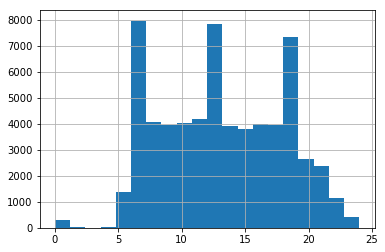

In [8]:
X['DepTime_Hour'].hist(bins=20)

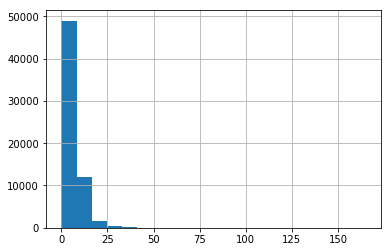

In [9]:
X['TaxiIn'].hist(bins=20)

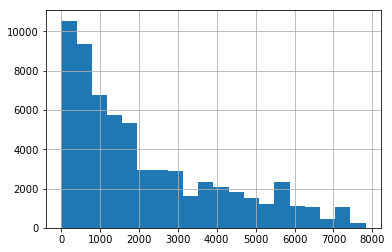

In [10]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

**10. (1 балл)** Вдобавок к масштабированию, некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).


Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [8]:
def transform_data(data):
    data1 = data
    mask = data1.dtypes.eq('int64') | data1.dtypes.eq('float')
    data1 = data1.loc[:,mask]
    data1 = data1.fillna(value = 0)
    col_names = list(data1.columns.values)
    scaler = StandardScaler()
    data1 = pd.DataFrame(scaler.fit_transform(data1), columns=col_names)
    
    data2 = data
    mask = data2.dtypes.eq('object')
    data2 = data2.loc[:,mask]
    data2 = data2.fillna(value = 'nan')
    data2 = pd.get_dummies(data2)
    
    data3 = data1.join(data2)
    data3 = data3.fillna(value = 0)
    
    return data3

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [9]:
X = transform_data(X)
print(X)

       CRSArrTime_Minute  CRSArrTime_Hour  ArrTime_Minute  ArrTime_Hour  \
0              -1.647149         1.725956       -1.234084      1.663973   
1              -0.051159         0.481702        0.034340      0.489585   
2              -0.507156         0.066951       -1.637673      0.098122   
3               0.347839        -0.347800       -0.369249     -0.293341   
4              -1.647149        -0.347800        0.783864     -0.489072   
5              -1.134152         0.274327        0.610897      0.293853   
6              -0.792154        -0.140424       -0.945806     -0.097609   
7               0.119840         1.311205        1.591043      1.076779   
8               0.062840        -1.384678       -0.542216     -1.271998   
9               0.461838        -3.043682       -0.311594     -2.837849   
10              1.487832         1.725956        0.322618     -2.837849   
11              0.347839         0.066951        1.418076      0.098122   
12              0.233839 

[63404 rows x 642 columns] => 642 признака

**11. (0.75 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [10]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state = 123) 

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [11]:
import sklearn.linear_model as lm


def MSE(regr, x, y):
    pred = regr.predict(x)
    y1 = np.array(y)
    return (np.mean((pred - y1) * (pred - y1)))

skm = lm.LinearRegression()
skm.fit(train_X[:1000], train_Y[:1000])
w = skm.coef_

colnames = list(X.columns.values)
print('R^2 на обучающей подвыборке = ', skm.score(train_X[:1000], train_Y[:1000]))
print('R^2 на контрольной выборке = ', skm.score(test_X, test_Y))
print('MSE на обучающей подвыборке = ', MSE(skm, train_X[:1000], train_Y[:1000]))
print('MSE на контрольной выборке = ', MSE(skm, test_X, test_Y))
pdw = pd.DataFrame({'Имя признака':colnames,'Вес признака':w},columns = ['Имя признака','Вес признака'])
print(pdw.sort_values(by = 'Вес признака'))


R^2 на обучающей подвыборке =  0.976522226968
R^2 на контрольной выборке =  0.911365368938
MSE на обучающей подвыборке =  37.8329008652
MSE на контрольной выборке =  108.122230447
          Имя признака  Вес признака
14             AirTime   -102.793221
17             TaxiOut    -17.986909
205         Origin_LGB    -15.169798
501           Dest_LFT    -15.078272
185         Origin_ISP    -14.850536
187         Origin_ITO    -14.819404
59          Origin_ALO    -14.748521
625           Dest_TUS    -14.515972
374           Dest_BMI    -13.721894
67          Origin_AVP    -12.482353
354           Dest_ALB    -12.182584
518           Dest_MDT    -10.865390
148         Origin_FNT    -10.510997
281         Origin_RIC    -10.434894
58          Origin_ALB    -10.052496
566           Dest_PNS     -9.577593
93          Origin_CAE     -9.560846
623           Dest_TRI     -9.251295
128         Origin_DSM     -9.213807
149         Origin_FSD     -9.004023
555           Dest_PBI     -8.347233
301   

R^2 очень близок к 1 => прогнозы должны быть довольно хорошими. на обучающей выборке R^2 заметно больше, чем на тестовой, некоторые веса довольно велики => наверное, имеет место переобучение.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**13. (1 балл)** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.12. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [13]:
from sklearn import cross_validation
import sklearn

X1000 = train_X[:1000]
Y1000 = train_Y[:1000]

alphagrid = np.linspace(0.1,10,100)

regr = sklearn.linear_model.RidgeCV(alphas=alphagrid, fit_intercept=False,
                                                                normalize=False, scoring=None, cv=5, 
                                                                gcv_mode=None, store_cv_values=False)
regr.fit(X1000, Y1000)
print('RidgeCV:')
print('R^2 на обучающей подвыборке = ', regr.score(X1000, Y1000))
print('R^2 на контрольной выборке = ', regr.score(test_X, test_Y))
print('MSE на обучающей подвыборке = ', MSE(regr, X1000, Y1000))
print('MSE на контрольной выборке = ', MSE(regr, test_X, test_Y))

regr1 = sklearn.linear_model.LassoCV(alphas=alphagrid, fit_intercept=False,
                                                                normalize=False, cv=5)
regr1.fit(X1000, Y1000)
print('LassoCV:')
print('R^2 на обучающей подвыборке = ', regr1.score(X1000, Y1000))
print('R^2 на контрольной выборке = ', regr1.score(test_X, test_Y))
print('MSE на обучающей подвыборке = ', MSE(regr1, X1000, Y1000))
print('MSE на контрольной выборке = ', MSE(regr1, test_X, test_Y))

RidgeCV:
R^2 на обучающей подвыборке =  0.964447132435
R^2 на контрольной выборке =  0.911477332445
MSE на обучающей подвыборке =  57.2911286034
MSE на контрольной выборке =  107.985650151
LassoCV:
R^2 на обучающей подвыборке =  0.957308489915
R^2 на контрольной выборке =  0.926204674496
MSE на обучающей подвыборке =  68.7945856979
MSE на контрольной выборке =  90.0202899752


C:\Users\agapo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


как видно, LassoCV заметно сократила разрав между R^2 и MSE на тестовой и обучающей выборках => проблема отчасти решена.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

**14. (0 баллов)** Добавьте к объектам обеих выборок из п. 11 единичный признак.

In [14]:
one = np.ones((test_X.shape[0],1))
test_X.insert(0,'const',one)

one = np.ones((train_X.shape[0],1))
train_X.insert(0,'const',one)

In [79]:
X1000 = train_X[:1000]
Y1000 = train_Y[:1000]

**15. (1 балл)** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [15]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return np.matmul(X,w)

In [16]:
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func(w, X, y):
    Xw = np.matmul(X,w)
    return np.mean(((y-Xw)/y)*((y-Xw)/y))

In [18]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    y_Xw = y - np.matmul(X,w)
    ans = np.matmul(np.transpose(X),y_Xw/(y*y))/(np.size(y))*(-2) 
    return ans

In [19]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    return (get_func(w, X, y) + np.sum(w*w))

In [20]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    w2 = get_grad(w, X, y)
    return (w*2)+w2

**16. (1 балл)** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [48]:
def grad(w, X, y, is_reg):
    if (is_reg == False):
        return get_grad(w,X,y)
    else:
        return get_reg_grad(w,X,y)

    
def func(w, X, y, is_reg):
    if (is_reg == False):
        return get_func(w,X,y)
    else:
        return get_reg_func(w,X,y)
    
    
def grad_descent(X, y, w0, step_size, max_iter, eps, is_reg):
    np_X = np.array(X)
    np_y = np.array(y).reshape(X.shape[0],1)
    
    iter = 0
    dw = 999999999
    
    f_val_list = []
    w_old = w0
    
    while ((dw > eps) & (iter < max_iter)):
        g = grad(w_old, np_X, np_y, is_reg)
        w_new = w_old - g*step_size
        iter = iter + 1;
        dw = (np.sum((w_new - w_old)*(w_new - w_old)))**0.5
        w_old = w_new
        f_val_list.append(func(w_old, np_X, np_y, is_reg))
    return w_old, f_val_list   

Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

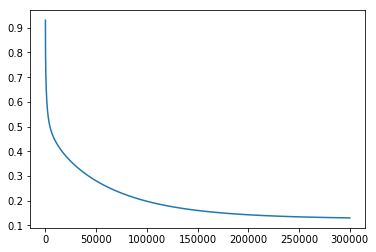

In [83]:
import matplotlib.pyplot as pyplt

w0 = np.zeros(X1000.shape[1]).reshape(X1000.shape[1],1)

w,f_val_list = grad_descent(X1000, Y1000, w0, 1, 300000, 0.00001, False)

pyplt.plot(f_val_list,label= 'test_MSPE_dynamics, step_size = 1')

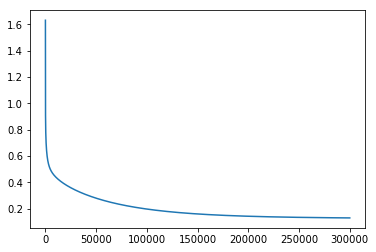

In [121]:
w0 = np.random.standard_normal((X1000.shape[1],1))

w,f_val_list = grad_descent(X1000, Y1000, w0, 1, 300000, 0.00001, False)

pyplt.plot(f_val_list,label= 'test_MSPE_dynamics, step_size = 1, random w0')

сходимость с начальными нулевыми весами особо не отличается от сходимости с начальными случайными весами (in long run)

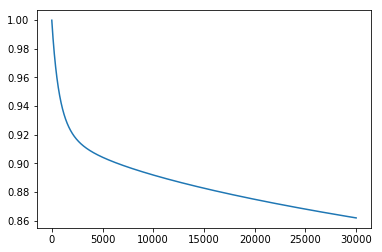

In [87]:
w0 = np.zeros(X1000.shape[1]).reshape(X1000.shape[1],1)

w,f_val_list = grad_descent(X1000, Y1000, w0, 0.001, 30000, 0.00001, False)

pyplt.plot(f_val_list,label= 'test_MSPE_dynamics, step_size = 0.001')

при step_size = 0.001 cсходимость очень медленная, однако она должна быть более точной

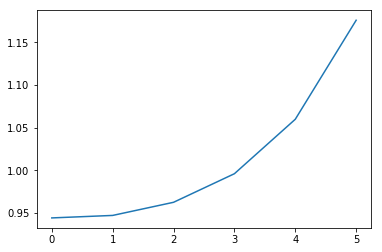

In [88]:
w0 = np.zeros(X1000.shape[1]).reshape(X1000.shape[1],1)

w,f_val_list = grad_descent(X1000, Y1000, w0, 1.9, 6, 0.00001, False)

pyplt.plot(f_val_list,label= 'test_MSPE_dynamics, step_size = 10')

при step_size = 10 сходимость не наблюдается (в данном случае приведён более наглядный график со step_size = 1.9)

уменьшение step_size замедляет сходимость, но увеличивает её качество; чем больше eps и меньше max_iter, тем хуже качество сходимости и меньше время обучения.

**17. (0.5 балла)** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

MSPE non reg =  0.962770792607
MSE =  36.4650648591


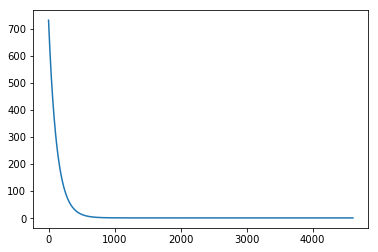

In [99]:
w0 = np.random.standard_normal((X1000.shape[1],1))

w,f_val_list = grad_descent(X1000, Y1000, w0, 0.002, 10000, 0.000000001, True)

pyplt.plot(f_val_list,label= 'test_MSPE_reg_dynamics, step_size = 1')

y1 = np.array(test_Y).reshape(test_X.shape[0],1)

MSPE = get_func(w,np.array(test_X),y1)

print('MSPE non reg = ',MSPE)

pred = make_pred(np.array(test_X),w)
print('MSE = ',(np.mean((y1-pred)*(y1-pred)))**0.5)

регуляризация резко увеличивает скорость сходимости

Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**18*. (1 бонусный балл)**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [ ]:
def sgd(X, y, step_size, max_iter, eps, is_reg):
    # Your code here

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [ ]:
# Your code here

**19*. (0.5 бонусного балла)** Аналогично п.17 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

In [ ]:
# Your code here

**20. (0.5 балла)** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.17? Почему?

In [120]:
skm = lm.LinearRegression()
skm.fit(X1000.drop('const',axis = 1), Y1000)

w = np.array(skm.coef_).reshape(test_X.shape[1]-1,1)

pred = skm.predict(test_X.drop('const',axis = 1))
x1=np.array(test_X.drop('const',axis = 1))
y1 = np.array(test_Y).reshape(test_X.shape[0],1)
Xw = np.matmul(x1,w)
print('MSPE = ',np.mean(((y1-Xw)/y1)*((y1-Xw)/y1)))
print('R^2 = ',skm.score(test_X.drop('const',axis = 1),test_Y))

MSPE =  35.0562099281
R^2 =  0.911365368938


In [ ]:
как видно, MSPE гораздо больше, чем в пункте 17, т.к. минимизация MSPE не эквивалентна минимизации MSE.